In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from sklearn.datasets import fetch_california_housing

In [108]:
# cargando el dataset
data_housing = fetch_california_housing()

# separando las variables independientes y dependiente
X = data_housing.data
y = data_housing.target

columns_names = data_housing.feature_names + ["target"]

X_y = np.hstack((X, y.reshape(-1,1)))

df_housing = pd.DataFrame(X_y, columns=columns_names)
df_housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Información de las variables

* MedInc: ingreso mediano en el grupo de manzanas.
* HouseAge: edad media de la vivienda en el grupo de bloques.
* AveRooms: número promedio de habitaciones por hogar.
* AveBedrms: número promedio de habitaciones por hogar.
* Population: población del grupo de bloques.
* AveOccup: número promedio de miembros del hogar.
* Latitude: latitud del grupo de bloques.
* Longitude:	longitud del grupo de bloques


In [109]:
# graficando las distribuciones de las variables
# sns.pairplot(df_housing)

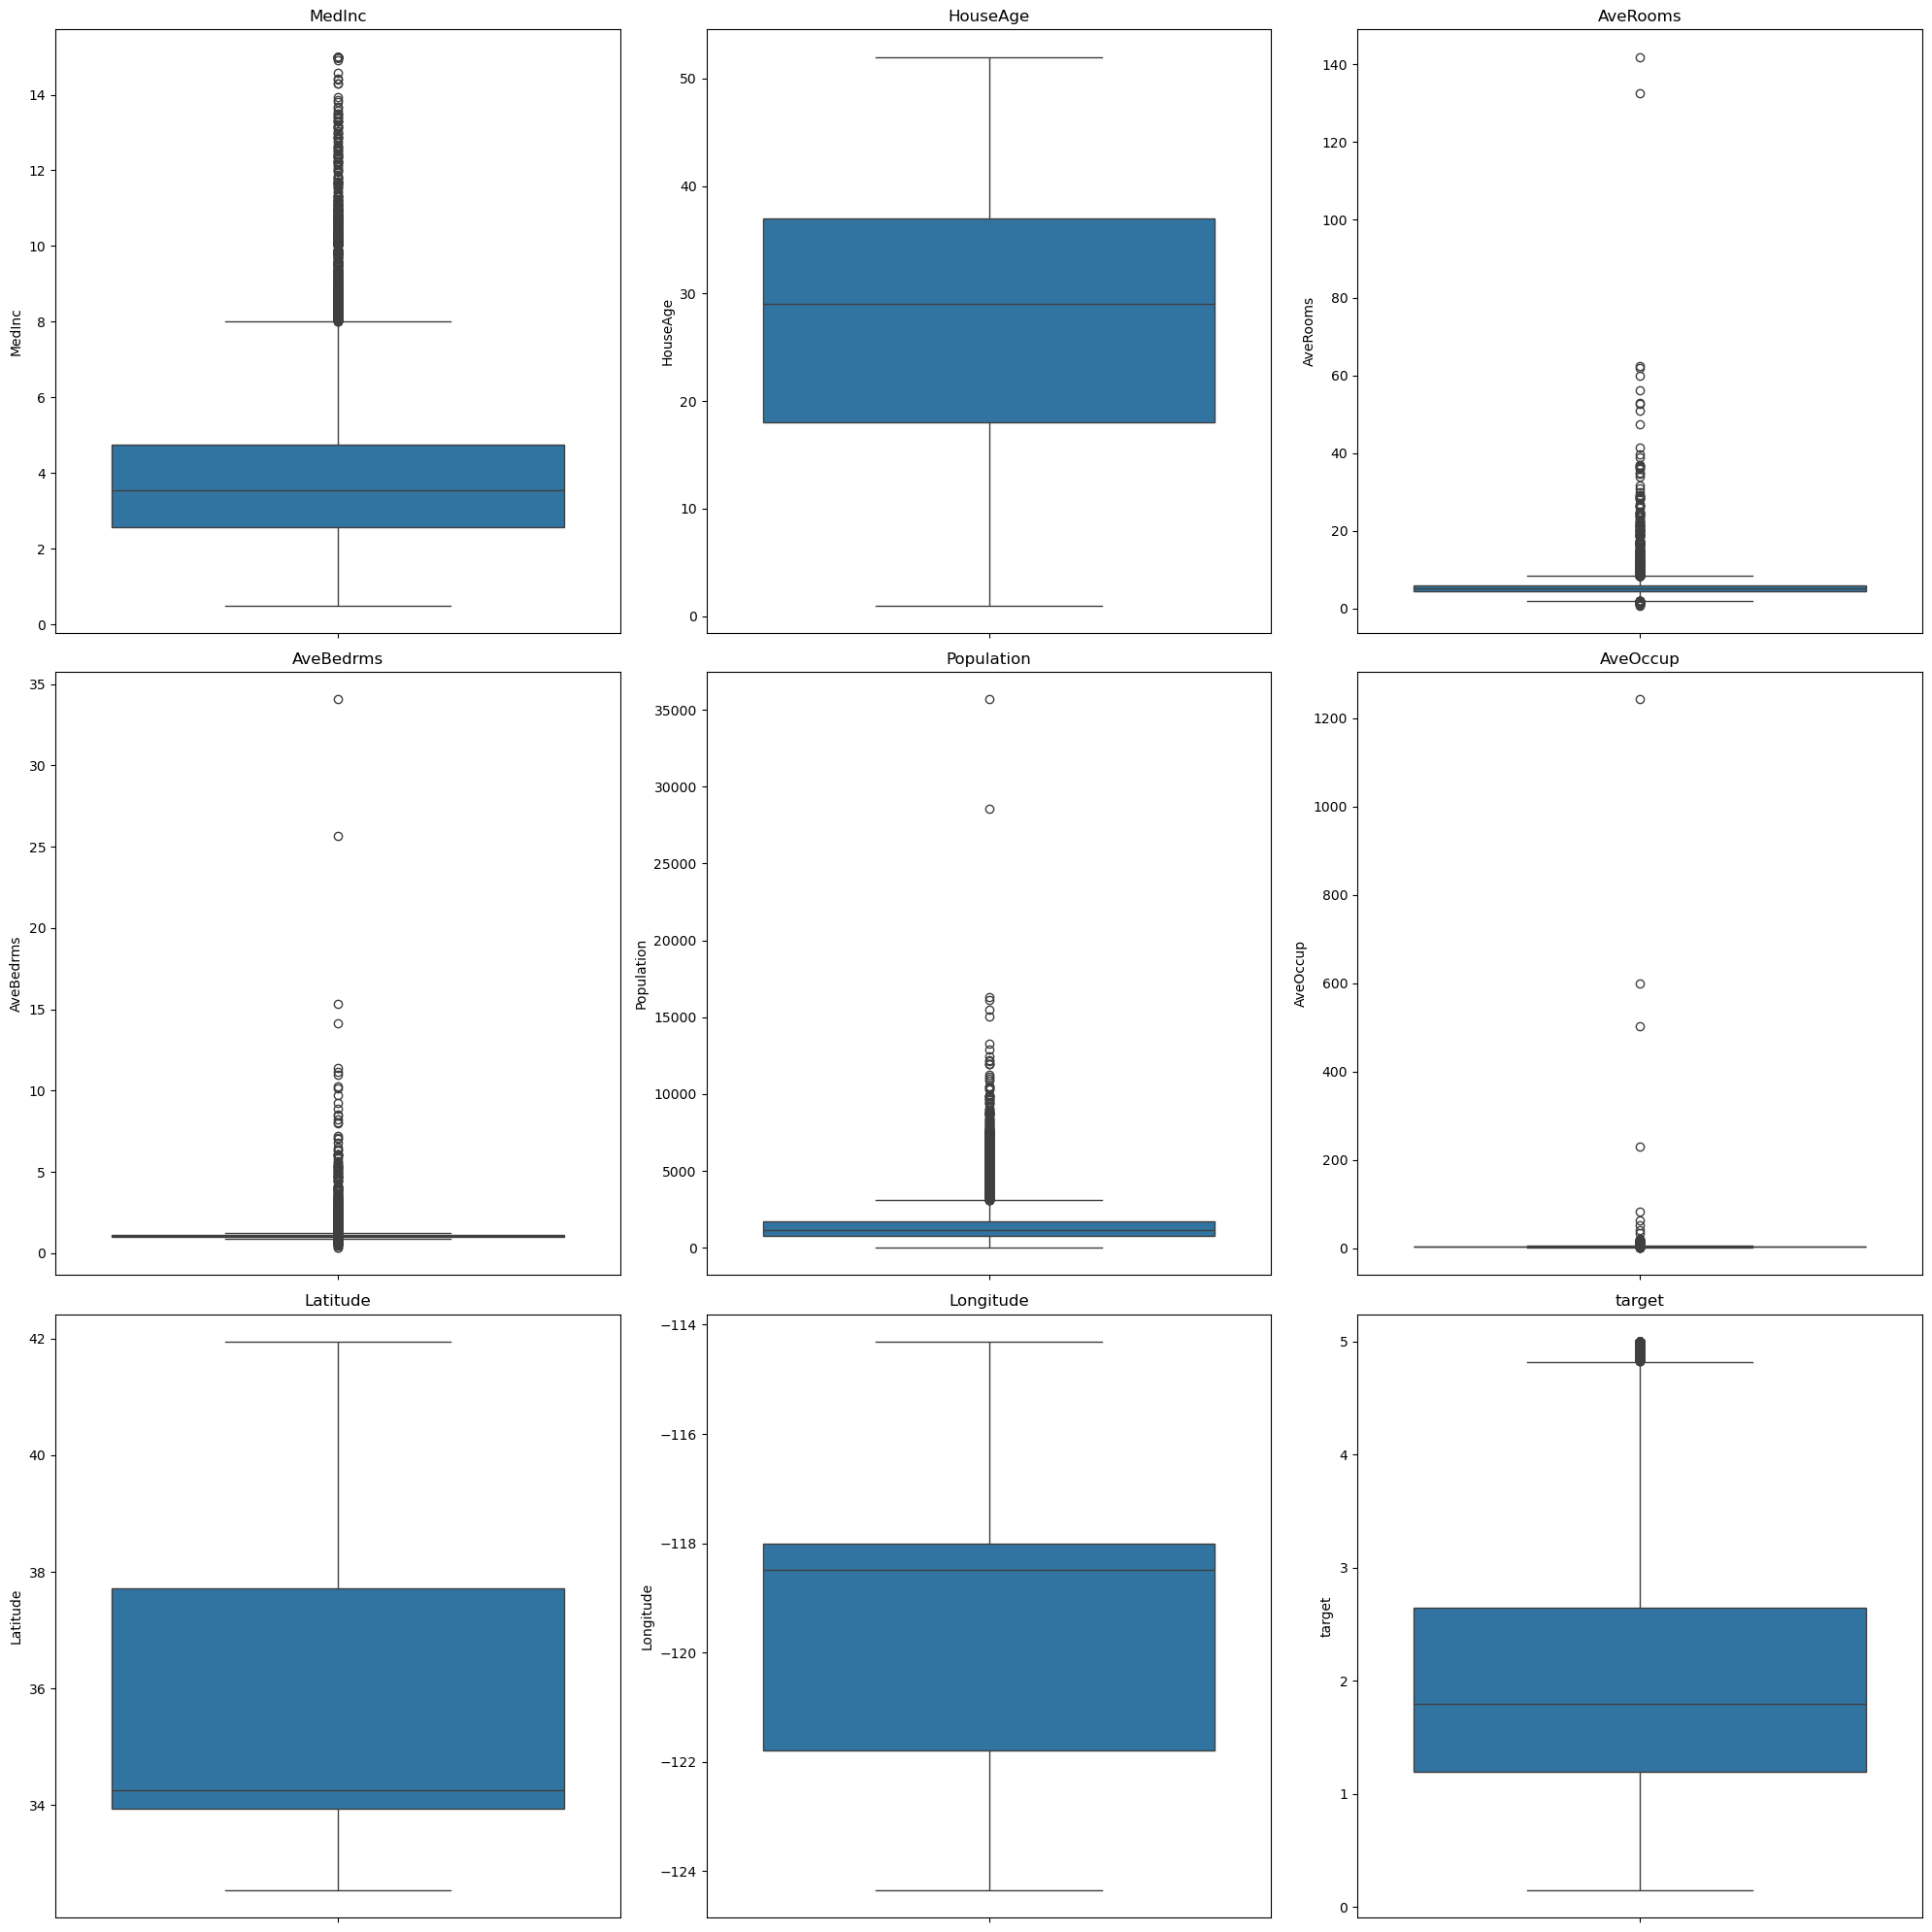

In [110]:
# diagrama de cajas y bigotes de las variables numéricas
fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flat

for i, col in enumerate(columns_names):
    sns.boxplot(data=df_housing, y=col, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [111]:
def del_outliers(df, cols_names):
    if cols_names is None:
        cols_names = df.select_dtypes(exclude="object").columns
    
    df_copy = df.copy()

    for col in cols_names:
        q1 = df_copy[col].quantile(0.25)
        q3 = df_copy[col].quantile(0.75)

        iqr = q3 -q1

        minimo = q1 - 1.5*iqr
        maximo = q3 + 1.5*iqr

        df_sin_outliers = df_copy[(df_copy[col] >= minimo) & (df_copy[col] <= maximo)]

    return df_sin_outliers

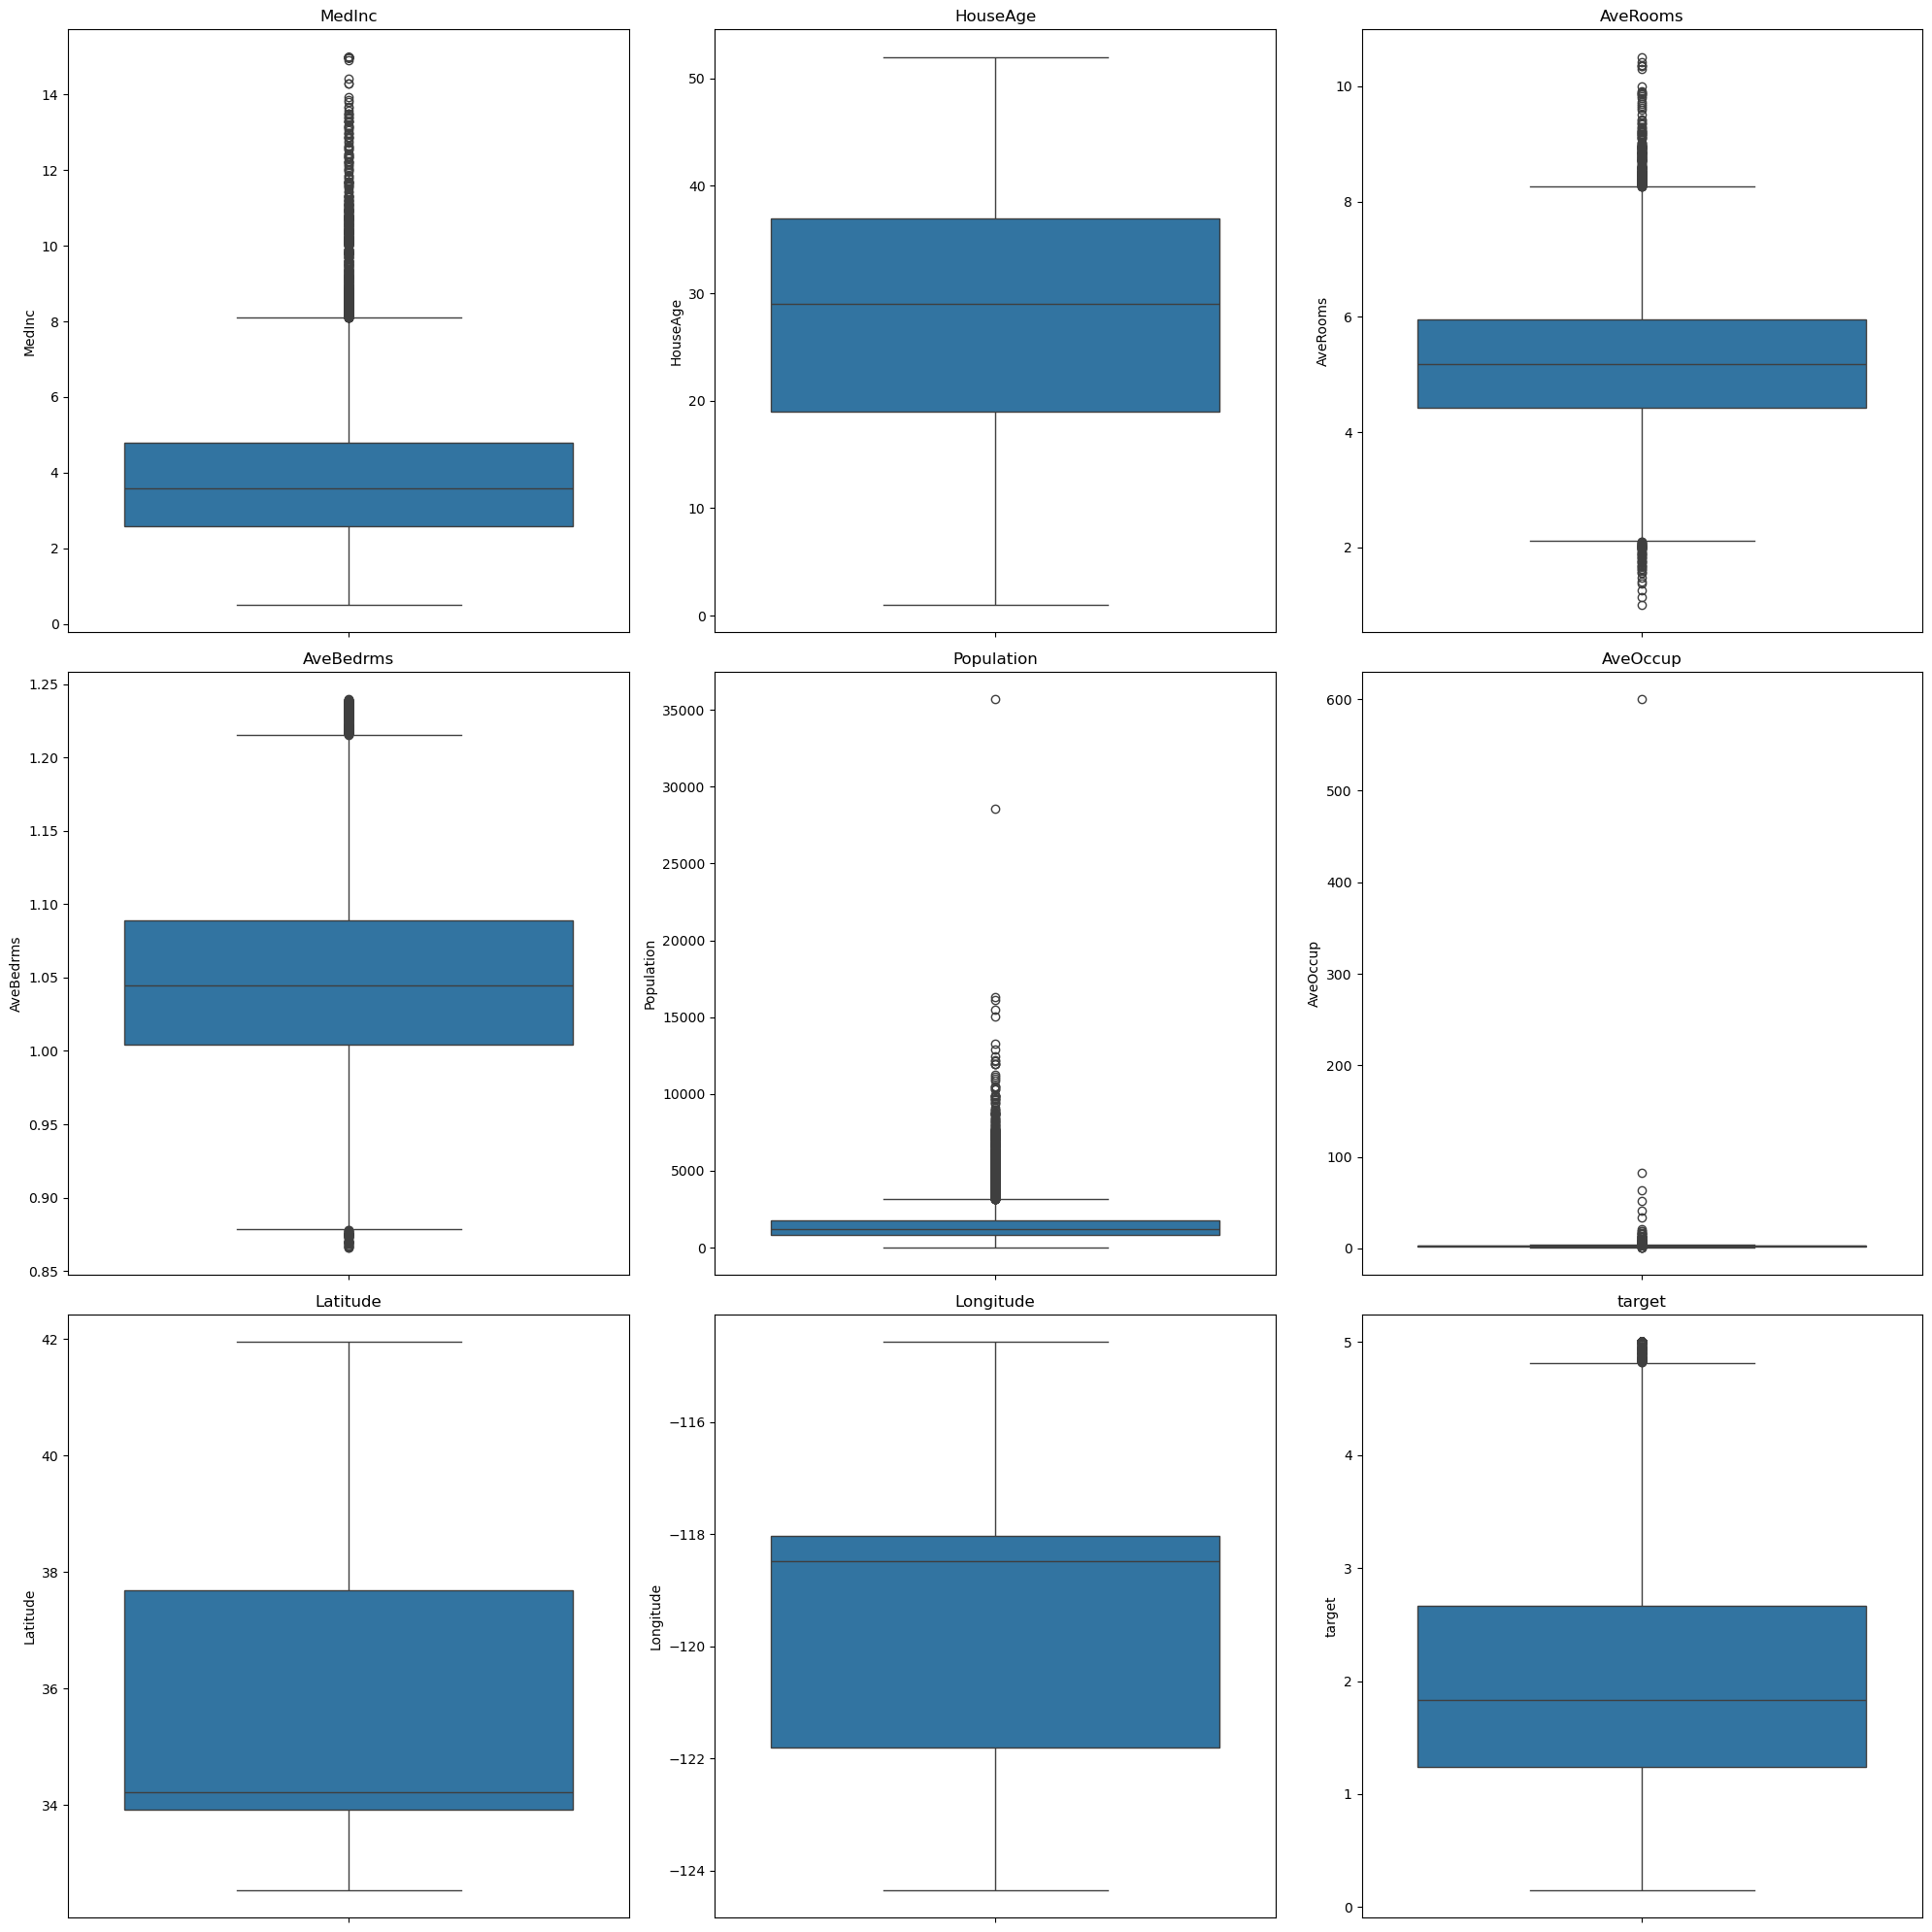

In [112]:
df_out_ave = del_outliers(df_housing, ["AveRooms", 'AveBedrms'])

fig, ax = plt.subplots(3,3, figsize=(20,20))
ax = ax.flat

for i, col in enumerate(columns_names):
    sns.boxplot(data=df_out_ave, y=col, ax=ax[i])
    ax[i].set_title(col)

plt.tight_layout()
plt.show()

In [113]:
def matriz_corr(df):
    df_corr = df.stack().reset_index()

    df_corr.columns= ["variable_1", "variable_2", "r"]
    df_corr = df_corr.loc[df_corr["variable_1"] != df_corr["variable_2"], :]
    df_corr["abs_r"] = np.abs(df_corr["r"])
    df_corr = df_corr.sort_values("r", ascending=False).reset_index(drop=True)
    return df_corr

## Matriz de correlacion de Pearson

  variable_1 variable_2         r     abs_r
0     MedInc   AveRooms  0.745442  0.745442
1   AveRooms     MedInc  0.745442  0.745442
2     target     MedInc  0.693077  0.693077
3     MedInc     target  0.693077  0.693077
4   AveRooms     target  0.377244  0.377244
5     target   AveRooms  0.377244  0.377244
6   Latitude   AveRooms  0.108290  0.108290
7   AveRooms   Latitude  0.108290  0.108290
8     target   HouseAge  0.103610  0.103610
9   HouseAge     target  0.103610  0.103610


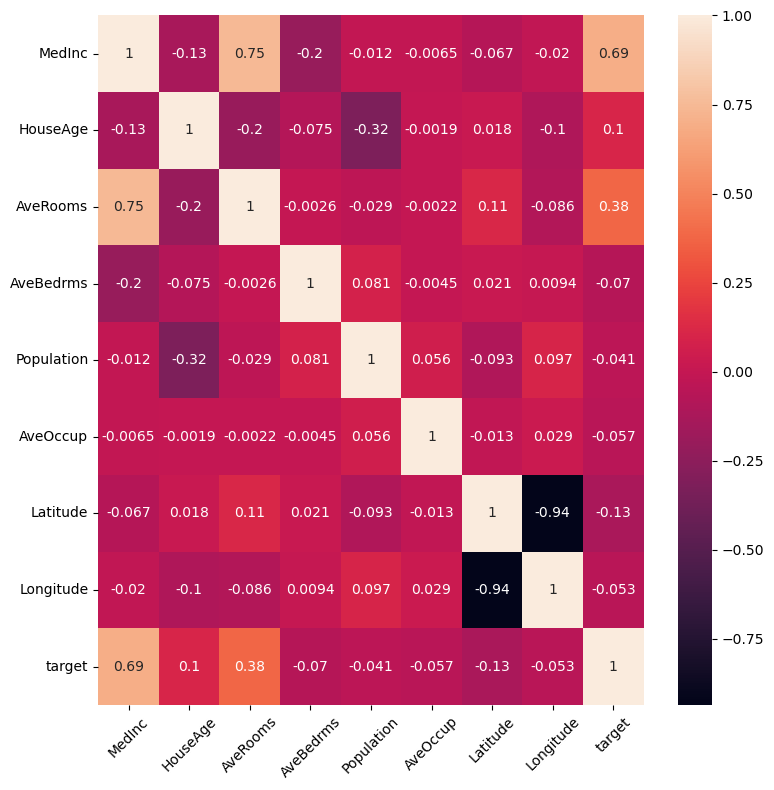

In [114]:
print(matriz_corr(df_out_ave.corr()).head(10))

plt.figure(figsize=(8,8))
sns.heatmap(df_out_ave.corr(), annot=True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [139]:
# Designando las variables independientes y dependientes
X = df_out_ave.drop("target", axis=1)
y = df_out_ave["target"].values.reshape(-1,1)

# separando los datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

sc_y = StandardScaler()
y_train_sc = sc_y.fit_transform(y_train)
y_test_sc = sc_y.transform(y_test)

In [140]:
# Entrenando el modelo con los datos de prueba
model_lr = LinearRegression()
_ = model_lr.fit(X_train_sc, y_train_sc)

In [141]:
# realizando la prediccion con los valores de prueba
predict_values = model_lr.predict(X_test_sc)

# calculando la métrica r2
r2 = r2_score(y_test_sc, predict_values)
print(f"El valor del coeficiente de determinación es: {np.round(r2,3)}")

# calculando la suma cuadrática media
mse = mean_squared_error(y_test_sc, predict_values)
print(f"El valor de la suma cuadrática media es: {np.round(mse,3)}")

El valor del coeficiente de determinación es: 0.632
El valor de la suma cuadrática media es: 0.381


In [160]:
# calculando una predicción
dato_prueba = X.iloc[0, :].values.reshape(1, -1)
dato_prueba = pd.DataFrame(dato_prueba, columns=data_housing.feature_names)
dato_prueba_sc = sc_X.transform(dato_prueba)
predict_sc = model_lr.predict(dato_prueba_sc)
predict_real = sc_y.inverse_transform(predict_sc)
print(f"La predicción del valor de prueba es: {predict_real[0][0].round(2)}")

La predicción del valor de prueba es: 4.22


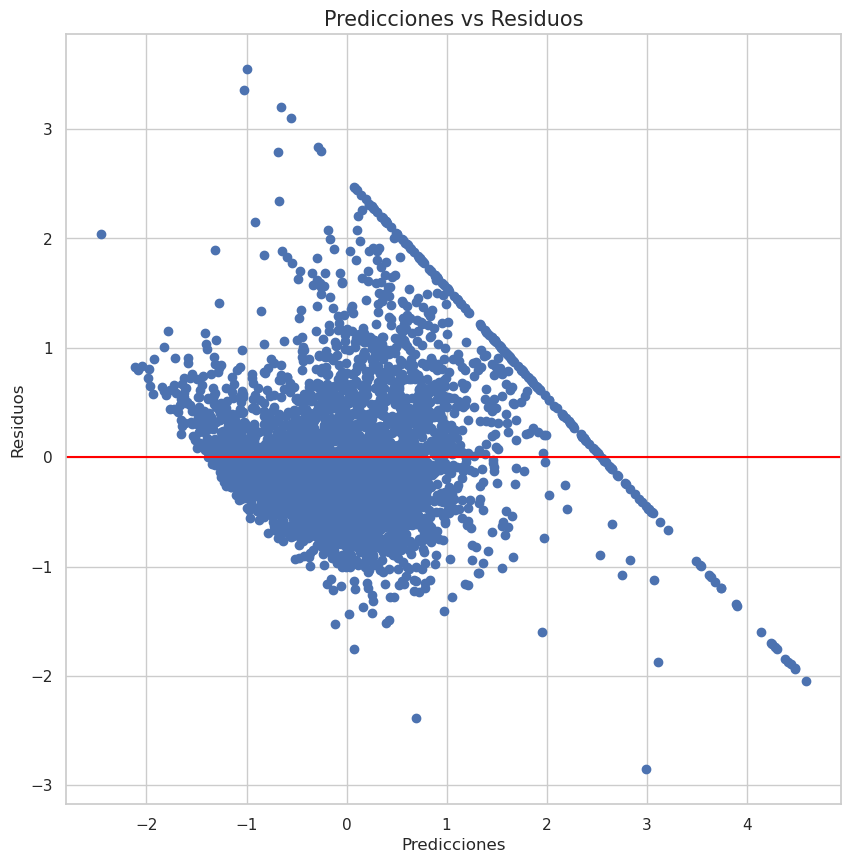

In [156]:
# Visualizando los errores
y_test_sc = y_test_sc.reshape(-1)
predict_values = predict_values.reshape(-1)

residuals = np.subtract(y_test_sc, predict_values)

plt.figure(figsize=(10,10))
sns.set(style='whitegrid', context='notebook')
plt.scatter(predict_values, residuals)
plt.axhline(y=0, color="red")
plt.title("Predicciones vs Residuos", size=15)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.show()

Línea roja horizontal: Representa el punto donde el residuo es cero. Idealmente, los puntos deberían estar distribuidos aleatoriamente alrededor de esta línea.